<a href="https://colab.research.google.com/github/GerardoMunoz/PresentacionesAlgebraLineal/blob/main/AL15_Nu_Im.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import animation,rc
pylab.rcParams['figure.figsize'] = (10, 4)
import sympy as sp
import math



fps=2
segundos=2
ejes_min=0
ejes_max=2


# Rutinas requeridas para la animación
def dibujo():    
    return fig,    
   
def animaciones_paso_3d(axs,fig,angulo):
    for ax in axs:
        ax.view_init(elev=10., azim=angulo)
    return fig, 

def animaciones3d(fig,axs,dibujo=dibujo, fps=fps, segundos=segundos):
    plt.close(fig)
    rc('animation', html='jshtml')
    frames=fps*segundos
    return animation.FuncAnimation(fig, lambda i : animaciones_paso_3d(axs,fig,i/frames*90), init_func=dibujo,
                               frames=frames, interval=int(1000/fps), blit=True)

# Utilidad para colorear el fondo
def color_fondo(ax,color):
    if ax.name=='3d':
        color=matplotlib.colors.to_rgba(color)
        ax.w_xaxis.set_pane_color(color)
        ax.w_yaxis.set_pane_color(color)
        ax.w_zaxis.set_pane_color(color)
    else:
        ax.set_facecolor(color)

# Dibuja flechas  
def flecha2d(ax,v,sumar=[0,0],nombre='',fontsize=15,**kwargs):
    ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.2,head_length=0.2, length_includes_head=True,**kwargs)
    if nombre!='':
        ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)

from mpl_toolkits.mplot3d import Axes3D

def flecha3d(ax,A:sp.Matrix,B:sp.Matrix=None,nombres=None,fontsize=15,**kwargs):#problemas en 2D
    if B==None:
        B=sp.zeros(*A.shape)
    elif A.shape!=B.shape:
        raise ValueError('flechas(ax,A) o flechas(ax,A,B) y A y B son del mismo tamaño')

    if isinstance(nombres,str):
        if A.cols==1:
            nombres=[nombres]
        else:
            nombres=[nombres+str(i) for i in range(A.cols)]
    elif (isinstance(nombres,list)) and (len(nombres)!=A.cols):
        raise ValueError('flechas(ax,A) o flechas(ax,A,n) y n="v" o  len(n)!=A.cols')
    elif not isinstance(nombres,list) and nombres!=None:
        raise ValueError('n es str o list')
        
    if A.rows==2:
        ax.quiver(B.row(0),B.row(1),A.row(0),A.row(1),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],nombres[i],fontsize=fontsize)
        
    elif A.rows==3:
        #AT=A.T
        ax.quiver(B.row(0),B.row(1),B.row(2),A.row(0),A.row(1),A.row(2),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],A.row(2)[i]+B.row(2)[i],nombres[i],fontsize=fontsize)
    else:
        raise ValueError('Sólo imprime matrices de 2 o 3 renglones')



# Dibuja líneas
def linea3d(ax,u,v=(0,0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),(u[2],v[2]),color,**kwargs)


# Dibuja planos
def plano3d(ax,u,v,color='k',**kwargs):
    x_min,x_max=ax.get_xlim()
    y_min,y_max=ax.get_ylim()
    det=u[0]*v[1]-u[1]*v[0]
    kx=(v[1]*u[2]-u[1]*v[2])/det
    ky=-(v[0]*u[2]-u[0]*v[2])/det

    xx=[[x_min,x_max],[x_min,x_max]]
    yy=[[y_min,y_min],[y_max,y_max]]
    zz=np.array([[kx*x_min+ky*y_min,kx*x_max+ky*y_min],[kx*x_min+ky*y_max,kx*x_max+ky*y_max]]).astype(np.float64)

    ax.plot_surface(xx, yy, zz, alpha=0.2)
        
    
#Determina si es 2D o 3D, dibuja los puntos y devuelve el respectivo ax
def subgrf(fig,graf,puntos,parametros):
    if puntos.rows==2:
        ax=fig.add_subplot(graf)
    elif puntos.rows==3:
        ax=fig.add_subplot(graf,projection='3d')
        ax.set_zlim(ejes_min,ejes_max)
    else:
        assert True, 'puntos1 debe tener 2 o 3 renglones'
    ax.set_xlim(ejes_min,ejes_max)
    ax.set_ylim(ejes_min,ejes_max)
    plt.plot(*np.array(puntos),'o-',color='black')
    return ax

#Asigna los dos subplots
def transf(puntos1:sp.Matrix,
           puntos2:sp.Matrix,
           parametros1:dict={},
           parametros2:dict={}):
    fig=plt.figure()
    #Crea ejes del sublot izquierdo
    ax1=subgrf(fig,121,puntos1,parametros1)
    ax2=subgrf(fig,122,puntos2,parametros2)
    return fig,ax1,ax2
    
    
    
casa_puntos=sp.Matrix([[0. , 0. , 0., 1. , 1 , 0. ],
                [0. , 1. , 1.5, 1. , 0. , 0. ]])


casa=sp.Matrix([[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],       
                [0.0, 1.0, 1.5, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]])

cubo_puntos=sp.Matrix([[0., 0., 0., 0., 1., 1., 1., 1.],
                [0., 0., 1., 1., 0., 0., 1., 1.],
                [0., 1., 0., 1., 0., 1., 0., 1.]])


cubo=sp.Matrix([[0.0,  0.0,  1.0,  1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  0.0], 
                [0.0,  1.0,  1.0,  0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  0.0,  0.0,  0.0,  0.0], 
                [0.0,  0.0,  0.0,  0.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0]])


Populating the interactive namespace from numpy and matplotlib


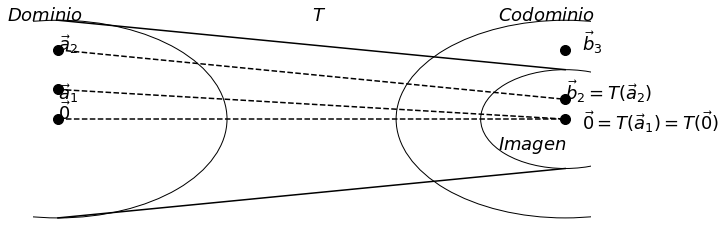

In [ ]:
# Omitir este código
# Este código dibuja dos conjuntos anidados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

puntos=[[3,  3  ,6, 3 , 6,  6],  # x1 x2 x3 x4
        [2,  2.3,2, 2.7,2.2,2.7]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[#(3,6),(1.5,2),'k', #(x1,x4),(y1,y4),color
        (3,6),(2.3,2),'k--', #(x2,x4),(y2,y4),color
        #(3,6),(2.5,2),'k', #(x2,x4),(y3,y4),color
        (3,6),(2.7,2.2),'k--', #(x2,x4),(y3,y4),color
        (3,6),(3,2.5),'k', #(x2,x4),(y3,y4),color
        (3,6),(1,1.5),'k', #(x2,x4),(y3,y4),color
        (3,6),(2,2),'k--', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)


ax.add_artist(plt.Circle((3, 2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 0.5, fill=False, color='k'))
#ax.add_artist(plt.Circle((3, 2), 0.5, fill=False,  color='k'))
#ax.add_artist(plt.Circle((0.95, 0.5), 0.01,  color='k'))
ax.text(4.5, 3, r'$T$',{'fontsize': 18})
#ax.text(3.8, 3, r'$A\vec{x}=\vec{0}$',{'fontsize': 18})
ax.text(6.1, 1.9, r'$\vec{0}=T(\vec{a}_1)=T(\vec{0})$',{'fontsize': 18})
ax.text(3, 2.7, r"$\vec{a}_2$",{'fontsize': 18})
ax.text(3, 2.2, r"$\vec{a}_1$",{'fontsize': 18})
ax.text(6., 2.2, r"$\vec{b}_2=T(\vec{a}_2)$",{'fontsize': 18})
ax.text(6.1, 2.7, r"$\vec{b}_3$",{'fontsize': 18})
#ax.text(2.7, 1.7, r'$Núcleo$',{'fontsize': 18})
ax.text(5.6, 1.7, r'$Imagen$',{'fontsize': 18})
ax.text(2.7, 3, r'$Dominio$',{'fontsize': 18})
ax.text(5.6, 3, r'$Codominio$',{'fontsize': 18})
ax.text(3, 2.0, r"$\vec{0}$",{'fontsize': 18})


ax.axis('off')
plt.show()

# Dominio y codominio de  una transformación
Sea $T_A:\mathbb{R}^n \rightarrow \mathbb{R}^m$ una transformación matricial, recordemos que el conjunto $\mathbb{R}^n$ se llama el **dominio** de la transformación y el conjunto $\mathbb{R}^m$ se llama el **codominio** de la transformación.




## Imagen

La **imagen de $T_A$** (denotada $\text{Im}(T_A)$) es el conjunto de vectores $T_A(\vec{x})$ del codominio para los cuales existe un vector $\vec{x}$ en el dominio. 

$\text{Im}(T_A)=\{T_A(\vec{x}) \mid \vec{x} \in \mathbb{R}^n \}$

En la figura anterior el vector $\vec{b}_2$ pertenece a la imagen de $T$ porque existe el vector $\vec{a}_2$ en el dominio tal que $\vec{b}_2=T(\vec{a}_2)$. 

La imagen de $T_A$ es lo mismo que:
* El conjunto de vectores $\vec{y}$ para que cumplen $A\vec{x}=\vec{y}$, para algún vector $x$.
* El espacio columna de la matriz $A$.
* El espacio generado por las columnas de la matriz $A$.

Como la imagen de $T_A$ es un subespacio del codominio, su dimensión se llama el **rango** de $T_A$ y se denota $\rho(T_A)$.

### En resumen
* $\text{Im}(T_A)=\text{Co}(A)$.
* $\rho(T_A)=\rho(A) $

## Ejemplo

In [ ]:
A=sp.Matrix([[0.7,0   ],
             [0  ,0.7 ],
             [0  ,0.7 ],
             ])

A

Matrix([
[0.7,   0],
[  0, 0.7],
[  0, 0.7]])

In [ ]:
fig,ax1,ax2=transf(casa,A*casa)
plano3d(ax2,A[:,0],A[:,1],color='k')
animaciones3d(fig,(ax2,) )

In [ ]:
M=A[:,:]
M

Matrix([
[0.7,   0],
[  0, 0.7],
[  0, 0.7]])

In [ ]:
M[2,:]+=(-1)*M[1,:]
M

Matrix([
[0.7,   0],
[  0, 0.7],
[  0,   0]])

$\rho(T_A)=2$, Por lo tanto la imagen de $T_A$ es un plano que pasa por el origen. Una base del plano es 

In [ ]:
A

Matrix([
[0.7,   0],
[  0, 0.7],
[  0, 0.7]])

## Ejemplo

In [ ]:
A=sp.Matrix([[0.5, 0 , 1 ],
             [0, .6 , .3 ],
             [0, .8 , .4 ]
             ])
A

Matrix([
[0.5,   0,   1],
[  0, 0.6, 0.3],
[  0, 0.8, 0.4]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
plano3d(ax2,A[:,0],A[:,1],color='k')
animaciones3d(fig,(ax1,ax2)) 

In [ ]:
M=A[:,:]
M

Matrix([
[0.5,   0,   1],
[  0, 0.6, 0.3],
[  0, 0.8, 0.4]])

In [ ]:
M[2,:] += M[1,:]*-0.8/0.6
M

Matrix([
[0.5,   0,   1],
[  0, 0.6, 0.3],
[  0,   0,   0]])

$\rho(T_A)=2$, Por lo tanto la imagen de $T_A$ es un plano que pasa por el origen. Una base del plano es 

In [ ]:
A[:,[0,1]]

Matrix([
[0.5,   0],
[  0, 0.6],
[  0, 0.8]])

## Ejemplo

In [ ]:
A=sp.Matrix([[0.9, 0 , 0 ],
             [0, .6 , 0.3 ],
             [0, 0 , 0.8 ]
             ])
A

Matrix([
[0.9,   0,   0],
[  0, 0.6, 0.3],
[  0,   0, 0.8]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
color_fondo(ax2,'lightsteelblue')
animaciones3d(fig,(ax1,ax2)) 

In [ ]:
M=A[:,:]
M

Matrix([
[0.9,   0,   0],
[  0, 0.6, 0.3],
[  0,   0, 0.8]])

$\rho(T_A)=3$, Por lo tanto la imagen de $T_A$ es todo el espacio $\mathbb{R}^3$. Una base del plano es 

In [ ]:
A

Matrix([
[0.9,   0,   0],
[  0, 0.6, 0.3],
[  0,   0, 0.8]])

## Ejemplo

In [ ]:
A=sp.Matrix([[50, 25 , 75 ],
             [30, 15 , 45 ],
             [40, 20 , 60 ]
             ])/100
A

Matrix([
[ 1/2,  1/4,  3/4],
[3/10, 3/20, 9/20],
[ 2/5,  1/5,  3/5]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
linea3d(ax2,8*A[:,0],color='b',alpha=0.5)
animaciones3d(fig,(ax1,ax2)) 

In [ ]:
M = A[:,:]
M

Matrix([
[ 1/2,  1/4,  3/4],
[3/10, 3/20, 9/20],
[ 2/5,  1/5,  3/5]])

In [ ]:
M[1,:] += M[0,:]*-3/10*2/1
M[2,:] += M[0,:]*-2/5*2/1
M

Matrix([
[1/2, 1/4, 3/4],
[  0,   0,   0],
[  0,   0,   0]])

$\rho(T_A)=1$, Por lo tanto la imagen de $T_A$ es una recta que pasa por el origen. Una base de la recta es 

In [ ]:
A[:,0]

Matrix([
[ 1/2],
[3/10],
[ 2/5]])

## Ejemplo

In [ ]:
A=sp.Matrix([[0.6, 0.3 , 0 ],
             [0  , 0.3 , 1 ],
            ])
A

Matrix([
[0.6, 0.3, 0],
[  0, 0.3, 1]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
color_fondo(ax2,'lightsteelblue')
animaciones3d(fig,(ax1,)) 

In [ ]:
M=A[:,:]
M

Matrix([
[0.6, 0.3, 0],
[  0, 0.3, 1]])

$\rho(T_A)=2$, Por lo tanto la imagen de $T_A$ es un plano que pasa por el origen. Una base del plano es 

In [ ]:
A[:,[0,1]]

Matrix([
[0.6, 0.3],
[  0, 0.3]])

##  Sobreyectiva
Una transformación $T$ es **sobreyectiva** si para cada vector  $\vec{y}$ del <u>codominio</u> existe algún vector $\vec{x}$ tal que  $T( \vec{x}) = \vec{y}$. 

Decir que una transformación matricial $T_A$ es sobreyectiva es lo mismo que decir cualquiera de las siguientes afirmaciones:
* $\text{Im}(T_A)=\mathbb{R}^m$
* El sistema $[A:\vec{b}]$ es consistente para todo $\vec{b} \in \mathbb{R}^m$
* $A$ tiene un l-pivote en cada <u>renglón</u>
* $\rho(A)=m$
* Las columnas de $A$ son generan $\mathbb{R}^m$.

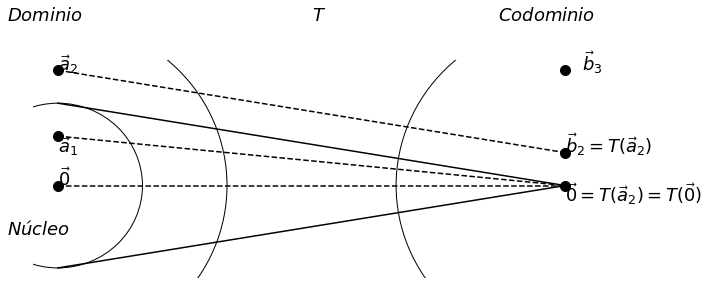

In [ ]:
# Omitir este código
# Este código dibuja dos conjuntos anidados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

puntos=[[3,   3  ,6, 3 , 6,  6],  # x1 x2 x3 x4
        [2, 2.3,2, 2.7,2.2,2.7]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[(3,6),(1.5,2),'k', #(x1,x4),(y1,y4),color
        (3,6),(2.3,2),'k--', #(x2,x4),(y2,y4),color
        (3,6),(2.5,2),'k', #(x2,x4),(y3,y4),color
        (3,6),(2,2),'k--', #(x2,x4),(y3,y4),color
        (3,6),(2.7,2.2),'k--', #(x2,x4),(y3,y4),color
        #(3,6),(3,2.5),'k', #(x2,x4),(y3,y4),color
        #(3,6),(1,1.5),'k', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)


ax.add_artist(plt.Circle((3, 2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 1, fill=False, color='k'))
#ax.add_artist(plt.Circle((6,2), 0.5, fill=False, color='k'))
ax.add_artist(plt.Circle((3, 2), 0.5, fill=False,  color='k'))
#ax.add_artist(plt.Circle((0.95, 0.5), 0.01,  color='k'))
ax.text(4.5, 3, r'$T$',{'fontsize': 18})
#ax.text(3.8, 3, r'$A\vec{x}=\vec{0}$',{'fontsize': 18})
ax.text(6, 1.9, r'$\vec{0}=T(\vec{a}_2)=T(\vec{0})$',{'fontsize': 18})
ax.text(3, 2.7, r"$\vec{a}_2$",{'fontsize': 18})
ax.text(3, 2.2, r"$\vec{a}_1$",{'fontsize': 18})
ax.text(3, 2.0, r"$\vec{0}$",{'fontsize': 18})
ax.text(6., 2.2, r"$\vec{b}_2=T(\vec{a}_2)$",{'fontsize': 18})
ax.text(6.1, 2.7, r"$\vec{b}_3$",{'fontsize': 18})
ax.text(2.7, 1.7, r'$Núcleo$',{'fontsize': 18})
#ax.text(5.6, 1.7, r'$Imagen$',{'fontsize': 18})
ax.text(2.7, 3, r'$Dominio$',{'fontsize': 18})
ax.text(5.6, 3, r'$Codominio$',{'fontsize': 18})

ax.axis('off')
plt.show()

## Núcleo

El **núcleo de $T_A$** (denotado $\text{Nu}(T_A)$) es el conjunto de los vectores $\vec{x}$ que pertenecen al dominio tales que $T_A(\vec{x})=0$.

$\text{Nu}(T_A)=\{\vec{x} \mid T_A(\vec{x})=0 \in \mathbb{R}^n \}$

En la figura anterior el vector $\vec{a}_1$ pertenece al núcleo de $T_A$ porque es transformado en el vector $\vec{0}$, mientras que  el vector $\vec{a}_2$ no.

El núcleo de $T_A$ es lo mismo que:
* El conjunto de vectores $\vec{x}$ que cumplen la ecuación $A\vec{x}=\vec{0}$
* La solución del sistema homogéneo $[A:\vec{0}]$
* El espacio nulo de la matriz $A$

Como el núcleo de $T_A$ es un subespacio del dominio, su dimensión se llama la **nulidad** de $T_A$ y se denota $\nu(T_A)$.

### En resumen
* $\text{Nu}(T_A)=\text{Nu}(A)$.
* $\nu(T_A)=\nu(A) $


## Ejemplo

In [ ]:
A=sp.Matrix([[0.7,0   ],
             [0  ,0.7 ],
             [0  ,0.7 ],
             ])

A

Matrix([
[0.7,   0],
[  0, 0.7],
[  0, 0.7]])

In [ ]:
fig,ax1,ax2=transf(casa,A*casa)
plano3d(ax2,A[:,0],A[:,1],color='k')
ax1.plot(0, 0, 'o', color='b', markersize=20);
animaciones3d(fig,(ax2,)) 

In [ ]:
M=A[:,:].row_join(sp.zeros(A.rows,1))
M

Matrix([
[0.7,   0, 0],
[  0, 0.7, 0],
[  0, 0.7, 0]])

In [ ]:
M[2,:]+=(-1)*M[1,:]
M

Matrix([
[0.7,   0, 0],
[  0, 0.7, 0],
[  0,   0, 0]])

$\nu(T_A)=0$, Por lo tanto el núcleo de $T_A$ es sólo el origen. La base del origen es el conjunto vacío $\emptyset$ 

## Ejemplo

In [ ]:
A=sp.Matrix([[0.5, 0 , 1 ],
             [0, .6 , .3 ],
             [0, .8 , .4 ]
             ])
A

Matrix([
[0.5,   0,   1],
[  0, 0.6, 0.3],
[  0, 0.8, 0.4]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
linea3d(ax1,sp.Matrix([-2,-0.5,1]),color='b',alpha=0.5)
plano3d(ax2,A[:,0],A[:,1],color='k')
animaciones3d(fig,(ax1,ax2),fps=30) 

In [ ]:
M=A[:,:].row_join(sp.zeros(A.rows,1))
M

Matrix([
[0.5,   0,   1, 0],
[  0, 0.6, 0.3, 0],
[  0, 0.8, 0.4, 0]])

In [ ]:
M[2,:] += M[1,:]*-0.8/0.6
M

Matrix([
[0.5,   0,   1, 0],
[  0, 0.6, 0.3, 0],
[  0,   0,   0, 0]])

$\nu(T_A)=1$, Por lo tanto el núcleo de $T_A$ es una recta que pasa por el origen. Para encontrar una base del núcleo hay que encontrar unas soluciones particulares básicas. 

In [ ]:
M[0,:]=M[0,:]/0.5
M[1,:]=M[1,:]/0.6
M

Matrix([
[1.0,   0, 2.0, 0],
[  0, 1.0, 0.5, 0],
[  0,   0,   0, 0]])

$x_0,x_1$ son variables delanteras y $x_2$ es una variable libre, a la que se le asigna el parámetro $t$. A continuación se despejan las variables delanteras y se encuentra la solución general y una solución particular básica.

In [ ]:
def sol_gen(t):
    
    # variable libre
    x2=t
    
    # variables delanteras
    x0=-2*x2
    x1=-0.5*x2
    
    return sp.Matrix([x0,x1,x2])

Una base para el nucleo es  

In [ ]:
sol_gen(1)

Matrix([
[  -2],
[-0.5],
[   1]])

## Ejemplo

In [ ]:
A=sp.Matrix([[0.9, 0 , 0 ],
             [0, .6 , 0.3 ],
             [0, 0 , 0.8 ]
             ])
A

Matrix([
[0.9,   0,   0],
[  0, 0.6, 0.3],
[  0,   0, 0.8]])

In [ ]:
fig,ax1,ax2=transf(cubo,A*cubo)
ax1.plot(0, 0, 'o', color='b', markersize=20,alpha=0.4);
color_fondo(ax2,'lightsteelblue')
animaciones3d(fig,(ax1,ax2)) 

In [ ]:
M=A[:,:].row_join(sp.zeros(A.rows,1))
M

Matrix([
[0.9,   0,   0, 0],
[  0, 0.6, 0.3, 0],
[  0,   0, 0.8, 0]])

$\nu(T_A)=0$, Por lo tanto el núcleo de $T_A$ es sólo el origen. La base del origen es el conjunto vacío $\emptyset$ 

## Ejemplo

In [ ]:
A=sp.Matrix([[50, 25 , 75 ],
             [30, 15 , 45 ],
             [40, 20 , 60 ]
             ])/100
A

Matrix([
[ 1/2,  1/4,  3/4],
[3/10, 3/20, 9/20],
[ 2/5,  1/5,  3/5]])

In [ ]:
C=sp.Matrix([[-0.5, -1.5], 
             [1,     0  ], 
             [0,    1   ]])

fig,ax1,ax2=transf(cubo,A*cubo)
plano3d(ax1,C[:,0],C[:,1],color='k')
linea3d(ax2,8*A[:,0],color='b',alpha=0.5)
animaciones3d(fig,(ax1,ax2)) 

In [ ]:
M = A[:,:].row_join(sp.zeros(A.rows,1))
M

Matrix([
[ 1/2,  1/4,  3/4, 0],
[3/10, 3/20, 9/20, 0],
[ 2/5,  1/5,  3/5, 0]])

In [ ]:
M[1,:] += M[0,:]*-3/10*2/1
M[2,:] += M[0,:]*-2/5*2/1
M

Matrix([
[1/2, 1/4, 3/4, 0],
[  0,   0,   0, 0],
[  0,   0,   0, 0]])

$\nu(T_A)=2$, Por lo tanto el núcleo de $T_A$ es un que pasa por el origen. Para encontrar la base es necesario encontrar unas soluciones básicas del sistema homogéneo. 

In [ ]:
M[0,:] = M[0,:]*2
M

Matrix([
[1, 1/2, 3/2, 0],
[0,   0,   0, 0],
[0,   0,   0, 0]])

$x_0$ es una variable delantera y $x_1,x_2$ son variables libres a las que se les asigna los parámetros $t_0,t_1$. A continuación se despeja la variable delantera y se encuentra la solución general y las soluciones particulares básicas.

In [ ]:
def sol_gen(t):
    
    #variables libres
    x1=t[0]
    x2=t[1]
    
    #variables delanteras
    x0= - x1 / 2 - x2 * 3 / 2

    return sp.Matrix([x0,x1,x2])

Una base para el núcleo es  

In [ ]:
sol_gen((1,0)).row_join(sol_gen((0,1)))

Matrix([
[-0.5, -1.5],
[   1,    0],
[   0,    1]])

## Ejemplo

In [ ]:
A=sp.Matrix([[6, 3 , 0 ],
             [0, 3 , 10 ],
            ])/10
A

Matrix([
[3/5, 3/10, 0],
[  0, 3/10, 1]])

In [ ]:
C=sp.Matrix([
          [  5/3],
          [-10/3],
          [    1]])
fig,ax1,ax2=transf(cubo,A*cubo)
linea3d(ax1,C/3,color='b',alpha=0.5)
color_fondo(ax2,'lightsteelblue')#'cornflowerblue'
animaciones3d(fig,(ax1,)) 

In [ ]:
M=A[:,:].row_join(sp.zeros(A.rows,1))
M

Matrix([
[3/5, 3/10, 0, 0],
[  0, 3/10, 1, 0]])

$\nu(T_A)=1$, Por lo tanto el núcleo de $T_A$ es una recta que pasa por el origen. Una base del nucle se obtien con unas soluciones básicas del sistema nomogéneo 

In [ ]:
M[0,:] += M[1,:] * -1
M

Matrix([
[3/5,    0, -1, 0],
[  0, 3/10,  1, 0]])

In [ ]:
M[0,:] = M[0,:] * 5 / 3
M[1,:] = M[1,:] * 10 / 3
M

Matrix([
[1, 0, -5/3, 0],
[0, 1, 10/3, 0]])

$x_0,x_1$ son variables delanteras y $x_2$ es una variable libre, a la que se le asigna el parámetro $t$. A continuación se despejan las variables delanteras y se encuentra la solución general y una solución particular básica.


In [ ]:
def sol_gen(t):
    
    #variables libres
    x2 = sp.S(t) #Cambia el formato para no usar decimales sino fraccionarios
    
    #variables delanteras
    x0 = x2 * 5 / 3
    x1 = - x2 * 10 / 3
 
    return sp.Matrix([x0,x1,x2])

Una base para el núcleo es  

In [ ]:
sol_gen(1)

Matrix([
[  5/3],
[-10/3],
[    1]])

## Inyectiva

Una transformación $T$ es **inyectiva** si para cada vector  $\vec{y}$ de la <u>imagen,</u> existe un <u>único</u> vector $\vec{x}$ tal que  $T( \vec{x}) = \vec{y}$. 

Decir que una transformación matricial $T_A$ es inyectiva es lo mismo que decir cualquiera de las siguientes afirmaciones:
* $\text{Nu}(T_A)=\{\vec{0}\}$
* El sistema homogéneo $[A:\vec{0}]$ tiene solución única
* $A$ tiene un l-pivote en cada columna
* $\nu(A)=0$
* Las columnas de $A$ son LI.


## Isomorfismo

Una transformación de $\mathbb{R}^n$ en $\mathbb{R}^m$ es **biyectiva** si es inyectiva y sobreyectiva.

Una transformación matricial biyectiva se llama un **isomorfismo**.

Cada una de las siguientes afirmaciones es lo mismo que decir que $T_A$ es un isomorfismo.
* $\text{Im}(T_A)=\mathbb{R}^m$ y $\text{Nu}(T_A)=\{\vec{0}\}$
* El sistema $[A:\vec{b}]$ tiene solución única para todo $\vec{b} \in \mathbb{R}^m$
* $A$ es cuadrada con $n$ l-pivotes
* $\rho(A)=m$ y $\nu(A)=0$
* Las columnas de $A$ son una base de $\mathbb{R}^m$ 
* $A$ es invertible
* $A$ es equivalente a la identidad

# Ejemplo:

Para las siguientes transformaciones matriciales:

$T_{A1}(\vec{x})=\left[ \matrix{1&2&3 \\ 4&8&6} \right]\left( \matrix{x_0 \\ x_1 \\ x_2} \right)$

Halle:
1. el dominio y el codominio 
2. la forma escalón y los pivotes de la matriz respectiva
3. la nulidad ($\nu$) y el rango ($\rho$)
4. la descripción geométrica del núcleo y de la imagen
5. una base del núcleo y una base de la imagen
6. una gráfica de los vectores de la base del núcleo y otra gráfica de los vectores de la base de la imagen
7. si es inyectiva o sobreyectiva o si es un isomorfismo

# Solución

Como la matriz tiene tres columnas, el dominio es de $\mathbb{R}^3$. 

El codominio es de $\mathbb{R}^2$ ya que la matriz tiene dos renglones.

In [ ]:
import sympy as sp
A1=sp.Matrix([[ 1,2,3 ],[ 4,8,6]])/10
A1

Matrix([
[1/10, 1/5, 3/10],
[ 2/5, 4/5,  3/5]])

2. Encontramos la forma escalón 

In [ ]:
M=A1[:,:] # hace una copia de la matriz evitando que ambas variables apunten la misma matriz
M

Matrix([
[1/10, 1/5, 3/10],
[ 2/5, 4/5,  3/5]])

In [ ]:
M[1,:] += -4*M[0,:]
M

Matrix([
[1/10, 1/5, 3/10],
[   0,   0, -3/5]])

In [ ]:
matriz_escalon_1=M

La anterior matriz en forma escalón tiene pivotes en las columnas 0 y 2.

3. Como hay una columna sin pivote, $\nu(T_{A1})=1$. Como hay dos pivotes, $\rho(T_{A1})=2$.  

In [ ]:
nulidad_1=1

In [ ]:
rango_1=2

4. Como  $\nu(T_{A1})=1$, el núcleo es una recta en $\mathbb{R}^3$ (el dominio) que pasa por el origen. Como $\rho(T_{A1})=2$, la imagen es un plano en $\mathbb{R}^2$ (el codominio), es decir es todo $\mathbb{R}^2$.

5. Para encontrar la base de la imagen es suficiente quitar las columnas sin pivote

In [ ]:
base_imagen_1 = A1[:,0].row_join(A1[:,2])
base_imagen_1

Matrix([
[1/10, 3/10],
[ 2/5,  3/5]])

La base del núcleo son las soluciones particulares básicas del sistema homogéneo $[A:\vec{0}]$, para encontrarlas usamos la matriz escalón.

In [ ]:
matriz_escalon_1

Matrix([
[1/10, 1/5, 3/10],
[   0,   0, -3/5]])

$x_0 + 2x_1 + 3x_2 =0$

$-6x_2=0$

Como $x_1$ es una variable libre, se les asigna un parámetro. 

$x_1=t_0$

Ahora se despejan las variables delanteras y se define la solución general 

In [ ]:
def solucion_general_1(t0):
    # variables libres
    x1=t0
    
    # variables delanteras
    x2=0
    x0=-3*x2-2*x1
    
    return (x0,x1,x2)
    
solucion_particular_basica_1_t0 = solucion_general_1(1)

solucion_particular_basica_1_t0

(-2, 1, 0)

In [ ]:
base_nucleo_1 = sp.Matrix(solucion_particular_basica_1_t0)

base_nucleo_1

Matrix([
[-2],
[ 1],
[ 0]])

6. A continuación, se grafica el vector de la base del núcleo como una flecha y los vectores de la base de la imagen con flechas 

In [ ]:
fig,ax1,ax2=transf(cubo,A1*cubo)
flecha3d(ax1,base_nucleo_1,nombres=r'$u$')
flecha2d(ax2,base_imagen_1[:,0],nombre='$v$') 
flecha2d(ax2,base_imagen_1[:,1],nombre='$u$') 
animaciones3d(fig,(ax1,)) 

7.

In [ ]:
sobreyectiva_1='si'

In [ ]:
inyectiva_1='no'

In [ ]:
isomorfismo_1='no'